In [1]:
%matplotlib notebook

import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from datetime import datetime, timedelta

import requests
from bs4 import BeautifulSoup
import matplotlib.dates as mdates

from scipy.optimize import curve_fit

import pandas as pd

import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

In [2]:
from commonFunctions import loadData, preProcess
        


In [3]:
dataDict = loadData()


In [46]:
plotMatrix[plotMatrix["Region"]=='South Asia']['Country'].unique()

array(['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Sri Lanka',
       'Nepal', 'Pakistan'], dtype=object)

# Prepare plot data
Postprocess `dataDict` before plotting  

In [4]:
# merge dataDict to one large plotMatrix
plotMatrix, countrywiseDataMatrix, waveWiseDataMatrix = preProcess(dataDict)

# consider only Europe and North America
# plotMatrix = plotMatrix[(plotMatrix['Region']=='Europe & Central Asia') | (plotMatrix['Region']=='North America')]

# Waves definition

<IPython.core.display.Javascript object>


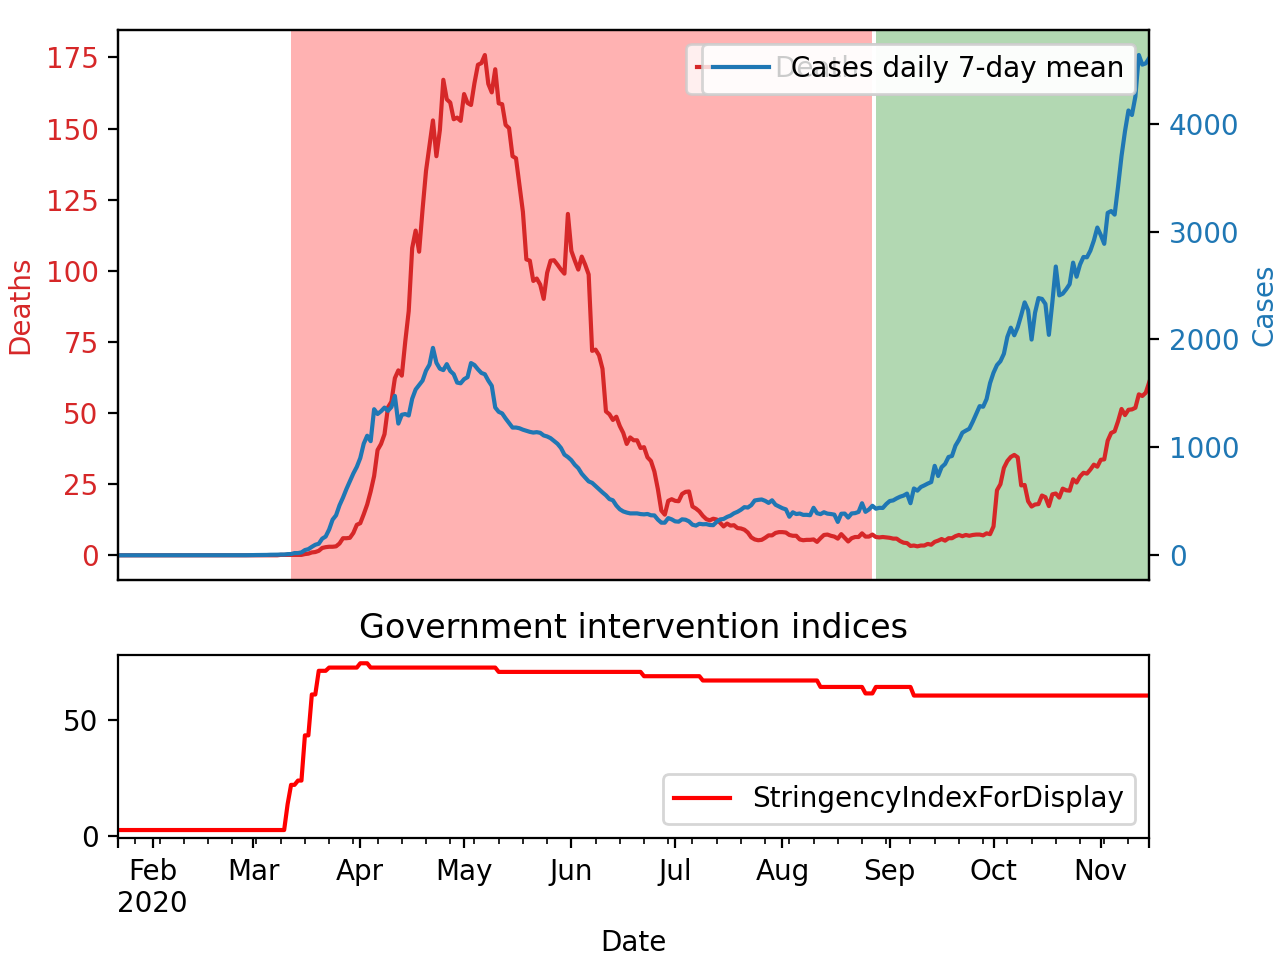

In [41]:
import matplotlib.pylab as plt
countries = ['Canada'] #'Monaco',

# plot
for cc in countries:
    f, (a0, a2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
    color0 = 'tab:red'
    a0.set_ylabel('Deaths', color=color0)
    a0.tick_params(axis='y', labelcolor=color0)

    a1 = a0.twinx()  # instantiate a second axes that shares the same x-axis

    color1 = 'tab:blue'
    a1.set_ylabel('Cases', color=color1)  # we already handled the x-label with ax1
    a1.tick_params(axis='y', labelcolor=color1)

    plot0 = dataDict[cc].plot(x = 'Date', y = 'Deaths daily 7-day mean', ax=a0, color=color0)
    plot1 = dataDict[cc].plot(x = 'Date', y = 'Cases daily 7-day mean', ax=a1, color=color1)
    
    plot3 = dataDict[cc].plot(x = 'Date', y = 'StringencyIndexForDisplay', ax=a2, color = 'red')
    plot4 = dataDict[cc].plot(x = 'Date', y = 'GovernmentResponseIndexForDisplay', ax=a2)
    plot5 = dataDict[cc].plot(x = 'Date', y = 'ContainmentHealthIndexForDisplay', ax=a2)
    plot6 = dataDict[cc].plot(x = 'Date', y = 'EconomicSupportIndexForDisplay', ax=a2)
    
    a2.get_legend().remove()
    a2.set_title('Government intervention indices')
    
    f.tight_layout()
    f.savefig('wavesDefinition_' + cc + '_'+ str(1) +'.pdf')
    
    # remove unneccesary plots
    a2.clear()
    plot3 = dataDict[cc].plot(x = 'Date', y = 'StringencyIndexForDisplay', ax=a2, color = 'red')
    a2.set_title('Government intervention indices')

    
    # plot waves
    currDf = dataDict[cc]
    for ww in range(1, int(currDf['Waves'].max()) + 1):
        if ww == 1:
            plotColor = 'red'
        elif ww == 2:
            plotColor = 'green'

        currWaveDates = currDf[currDf['Waves']==ww]['Date']
        a0.axvspan(currWaveDates.values[0], currWaveDates.values[-1], facecolor=plotColor, alpha=0.3)
    plt.show()

    a0.xaxis.set_visible(False)

    f.tight_layout()
    f.savefig('wavesDefinition_' + cc + '_'+ str(2)+'.pdf')

# Deaths in European countries

In [17]:
import matplotlib.pylab as plt
waveWiseDataMatrix_curr = waveWiseDataMatrix[waveWiseDataMatrix['Region']=='Europe & Central Asia']
waveWiseDataMatrix_first = waveWiseDataMatrix_curr[waveWiseDataMatrix_curr['Wave']==1]
waveWiseDataMatrix_second = waveWiseDataMatrix_curr[waveWiseDataMatrix_curr['Wave']==2]
# init
xPlotQuant = 'Expected stringency'
yPlotQuant = 'Normalized total deaths'

<IPython.core.display.Javascript object>


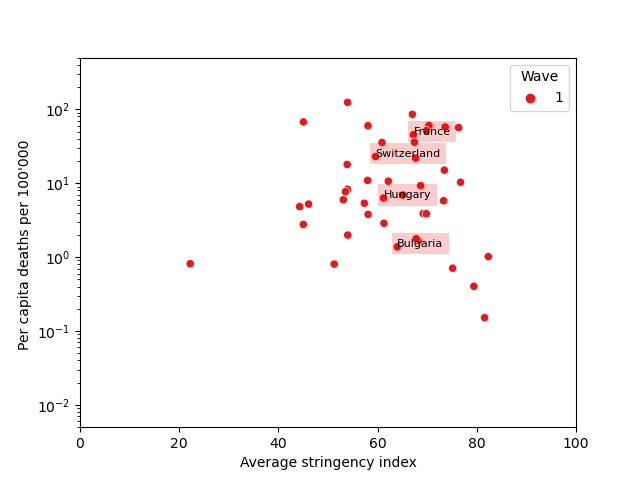

In [18]:
# plot first wave
f, a0 = plt.subplots()
sns.scatterplot(data=waveWiseDataMatrix_first, x = xPlotQuant, y = yPlotQuant,  ax=a0, hue = 'Wave', palette="Set1")

# label selected countries
countries = ['Bulgaria', 'France', 'Switzerland','Hungary'] #waveWiseDataMatrix_first['Country'].unique()#
for cc in countries:
    xCoord = waveWiseDataMatrix_first[waveWiseDataMatrix_first['Country']==cc][xPlotQuant].values[0]
    yCoord = waveWiseDataMatrix_first[waveWiseDataMatrix_first['Country']==cc][yPlotQuant].values[0]
    a0.annotate(cc, xy=(xCoord, yCoord), fontsize= 8, bbox=dict(facecolor='red', alpha=0.2, ec="none"))
    
a0.set(xlabel='Average stringency index', ylabel='Per capita deaths per 100\'000 ')
a0.set(yscale='log', ylim=[5e-3,5e2], xlim=[0, 100])
f.savefig('europeDeaths_1.pdf')

<IPython.core.display.Javascript object>


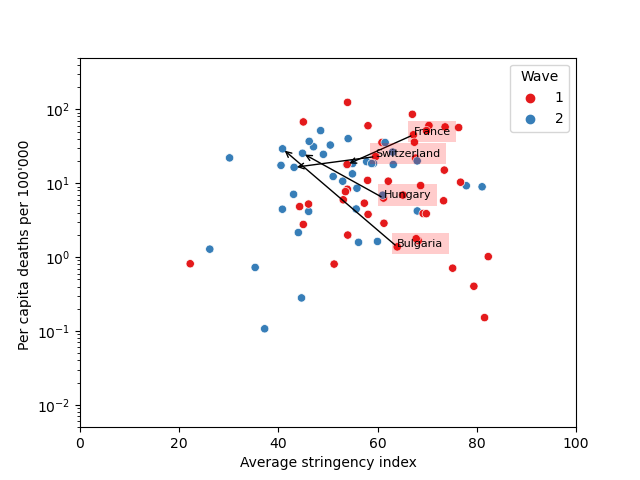

In [19]:
# plot second wave
f, a0 = plt.subplots()
sns.scatterplot(data=waveWiseDataMatrix_curr[waveWiseDataMatrix_curr['Wave']>0], x = xPlotQuant, y = yPlotQuant,  ax=a0, hue = 'Wave', palette="Set1")

# label selected countries
for cc in countries:
    xCoord = waveWiseDataMatrix_first[waveWiseDataMatrix_first['Country']==cc][xPlotQuant].values[0]
    yCoord = waveWiseDataMatrix_first[waveWiseDataMatrix_first['Country']==cc][yPlotQuant].values[0]
    xCoord_point = waveWiseDataMatrix_second[waveWiseDataMatrix_second['Country']==cc][xPlotQuant].values[0]
    yCoord_point = waveWiseDataMatrix_second[waveWiseDataMatrix_second['Country']==cc][yPlotQuant].values[0]
    
    a0.annotate(cc, xy=(xCoord, yCoord), fontsize= 8, bbox=dict(facecolor='red', alpha=0.2, ec="none"))
    a0.annotate('', xytext=(xCoord, yCoord), xy=(xCoord_point, yCoord_point), arrowprops=dict(arrowstyle="->"))

a0.set(xlabel='Average stringency index', ylabel='Per capita deaths per 100\'000 ')
a0.set(yscale='log', ylim=[5e-3,5e2], xlim=[0, 100])
f.savefig('europeDeaths_2.pdf')

<IPython.core.display.Javascript object>


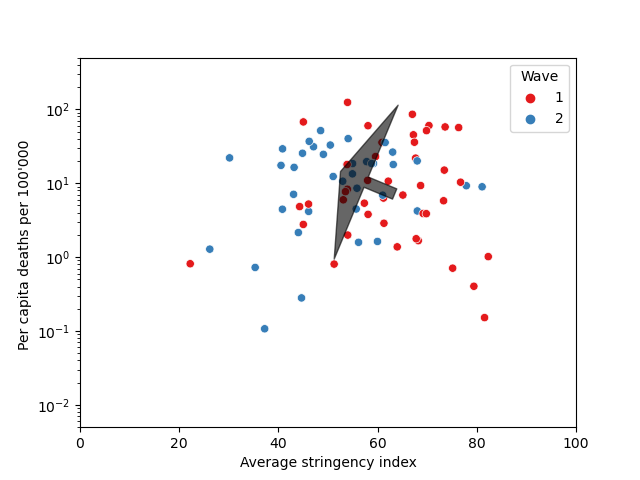

In [20]:
import matplotlib.patches as mpatches

# plot wave connections
f, a0 = plt.subplots()
sns.scatterplot(data=waveWiseDataMatrix_curr[waveWiseDataMatrix_curr['Wave']>0], x = xPlotQuant, y = yPlotQuant,  ax=a0, hue = 'Wave', palette="Set1")

# compute center and show
medianFirst = waveWiseDataMatrix_first.median()
medianSecond = waveWiseDataMatrix_second.median()

# define arrow
arrow = mpatches.FancyArrowPatch((medianFirst[xPlotQuant], medianFirst[yPlotQuant]),
                                 (medianSecond[xPlotQuant], medianSecond[yPlotQuant]), 
                                 mutation_scale=40, alpha=0.6, color='black')
arrow.set_arrowstyle("Simple, head_width=3")
a0.add_patch(arrow)

a0.set(xlabel='Average stringency index', ylabel='Per capita deaths per 100\'000 ')
a0.set(yscale='log', ylim=[5e-3,5e2], xlim=[0, 100])
f.savefig('europeDeaths_3.pdf')

# Deaths worldwide

In [21]:
import matplotlib.pylab as plt
waveWiseDataMatrix_curr = waveWiseDataMatrix
waveWiseDataMatrix_first = waveWiseDataMatrix_curr[waveWiseDataMatrix_curr['Wave']==1]
waveWiseDataMatrix_second = waveWiseDataMatrix_curr[waveWiseDataMatrix_curr['Wave']==2]
# init
xPlotQuant = 'Expected stringency'
yPlotQuant = 'Normalized total deaths'

<IPython.core.display.Javascript object>


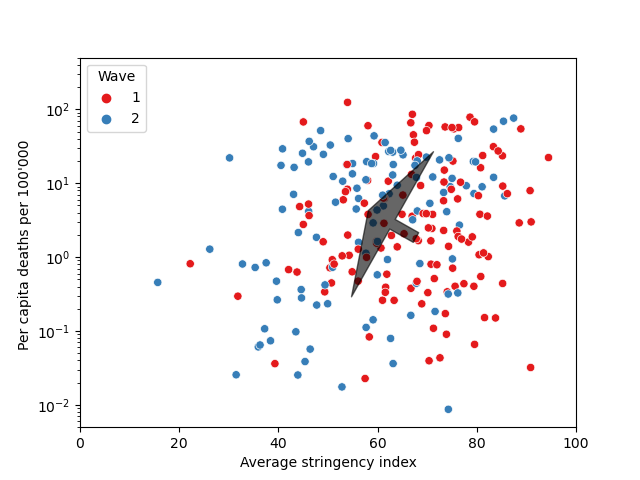

In [22]:
# plot first wave
f, a0 = plt.subplots()
sns.scatterplot(data=waveWiseDataMatrix_curr[waveWiseDataMatrix_curr['Wave']>0], x = xPlotQuant, y = yPlotQuant,  ax=a0, hue = 'Wave', palette="Set1")

# compute center and show
medianFirst = waveWiseDataMatrix_first.median()
medianSecond = waveWiseDataMatrix_second.median()

# define arrow
arrow = mpatches.FancyArrowPatch((medianFirst[xPlotQuant], medianFirst[yPlotQuant]),
                                 (medianSecond[xPlotQuant], medianSecond[yPlotQuant]), 
                                 mutation_scale=40, alpha=0.6, color='black')
arrow.set_arrowstyle("Simple, head_width=3")
a0.add_patch(arrow)

a0.set(xlabel='Average stringency index', ylabel='Per capita deaths per 100\'000 ')
a0.set(yscale='log', ylim=[5e-3,5e2], xlim=[0, 100])
f.savefig('worldDeaths_1.pdf')

<IPython.core.display.Javascript object>


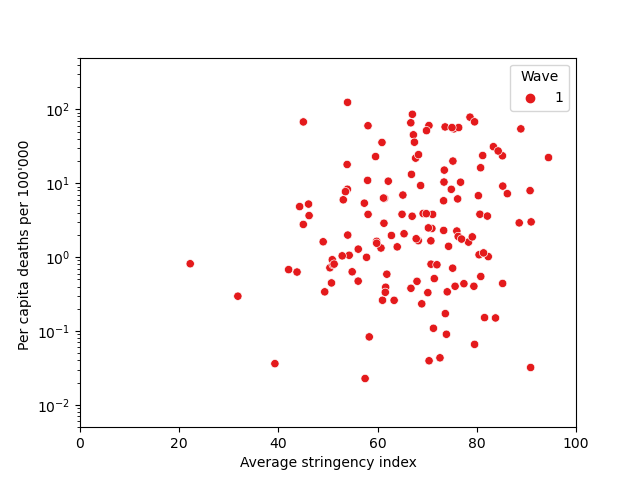

In [24]:
# plot first wave only
f, a0 = plt.subplots()
sns.scatterplot(data=waveWiseDataMatrix_first, x = xPlotQuant, y = yPlotQuant,  ax=a0, hue = 'Wave', palette="Set1")

a0.set(xlabel='Average stringency index', ylabel='Per capita deaths per 100\'000 ')
a0.set(yscale='log', ylim=[5e-3,5e2], xlim=[0, 100])
f.savefig('worldDeaths_2.pdf')

<IPython.core.display.Javascript object>


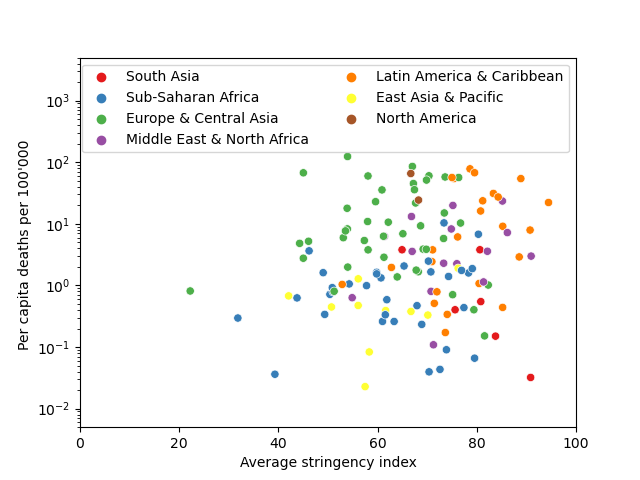

In [27]:
# plot first wave only
f, a0 = plt.subplots()
sns.scatterplot(data=waveWiseDataMatrix_first, x = xPlotQuant, y = yPlotQuant,  ax=a0, hue = 'Region', palette="Set1")

plt.legend(ncol=2)
a0.set(xlabel='Average stringency index', ylabel='Per capita deaths per 100\'000 ')
a0.set(yscale='log', ylim=[5e-3,5e3], xlim=[0, 100])
f.savefig('worldDeaths_3.pdf')

<IPython.core.display.Javascript object>


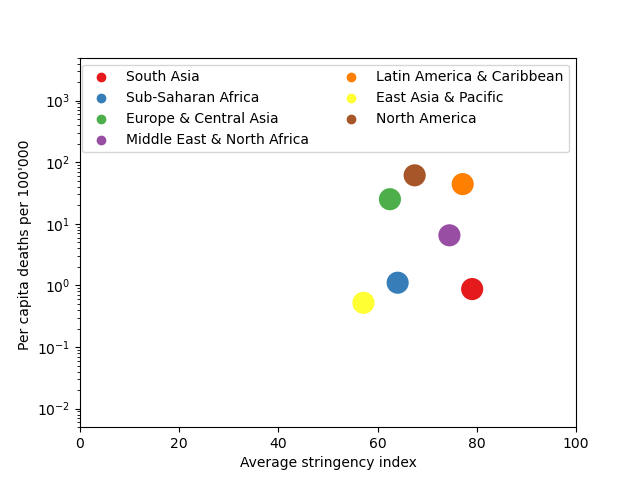

In [40]:
# plot first wave only
f, a0 = plt.subplots()

# compute center and show
regionList = waveWiseDataMatrix_first['Region'].unique()
medianPoints = []
for rr in regionList:
    scaleFactor = 1e5
    totalDeaths = waveWiseDataMatrix_first[waveWiseDataMatrix_first['Region']==rr]['Total deaths'].sum()
    # compute region-wise population
    population = 0
    for cc in plotMatrix[plotMatrix['Region']==rr]['Country'].unique():
        population += dataDict[cc]['Population'][0]
        
    medianPoint = waveWiseDataMatrix_first[waveWiseDataMatrix_first['Region']==rr].mean()
    sumPoint = waveWiseDataMatrix_first[waveWiseDataMatrix_first['Region']==rr].sum()
    medianPoints.append([medianPoint[xPlotQuant], totalDeaths*scaleFactor/population, rr])

medianDF = pd.DataFrame(medianPoints, columns=[xPlotQuant, yPlotQuant, 'Region'])    
sns.scatterplot(data=medianDF, x = xPlotQuant, y = yPlotQuant,  ax=a0, hue = 'Region', palette="Set1", s=300)
plt.legend(ncol=2)
a0.set(xlabel='Average stringency index', ylabel='Per capita deaths per 100\'000 ')
a0.set(yscale='log', ylim=[5e-3,5e3], xlim=[0, 100])

f = plt.gcf()
f.savefig('worldDeaths_4.pdf')

# Predicting government actions

<IPython.core.display.Javascript object>


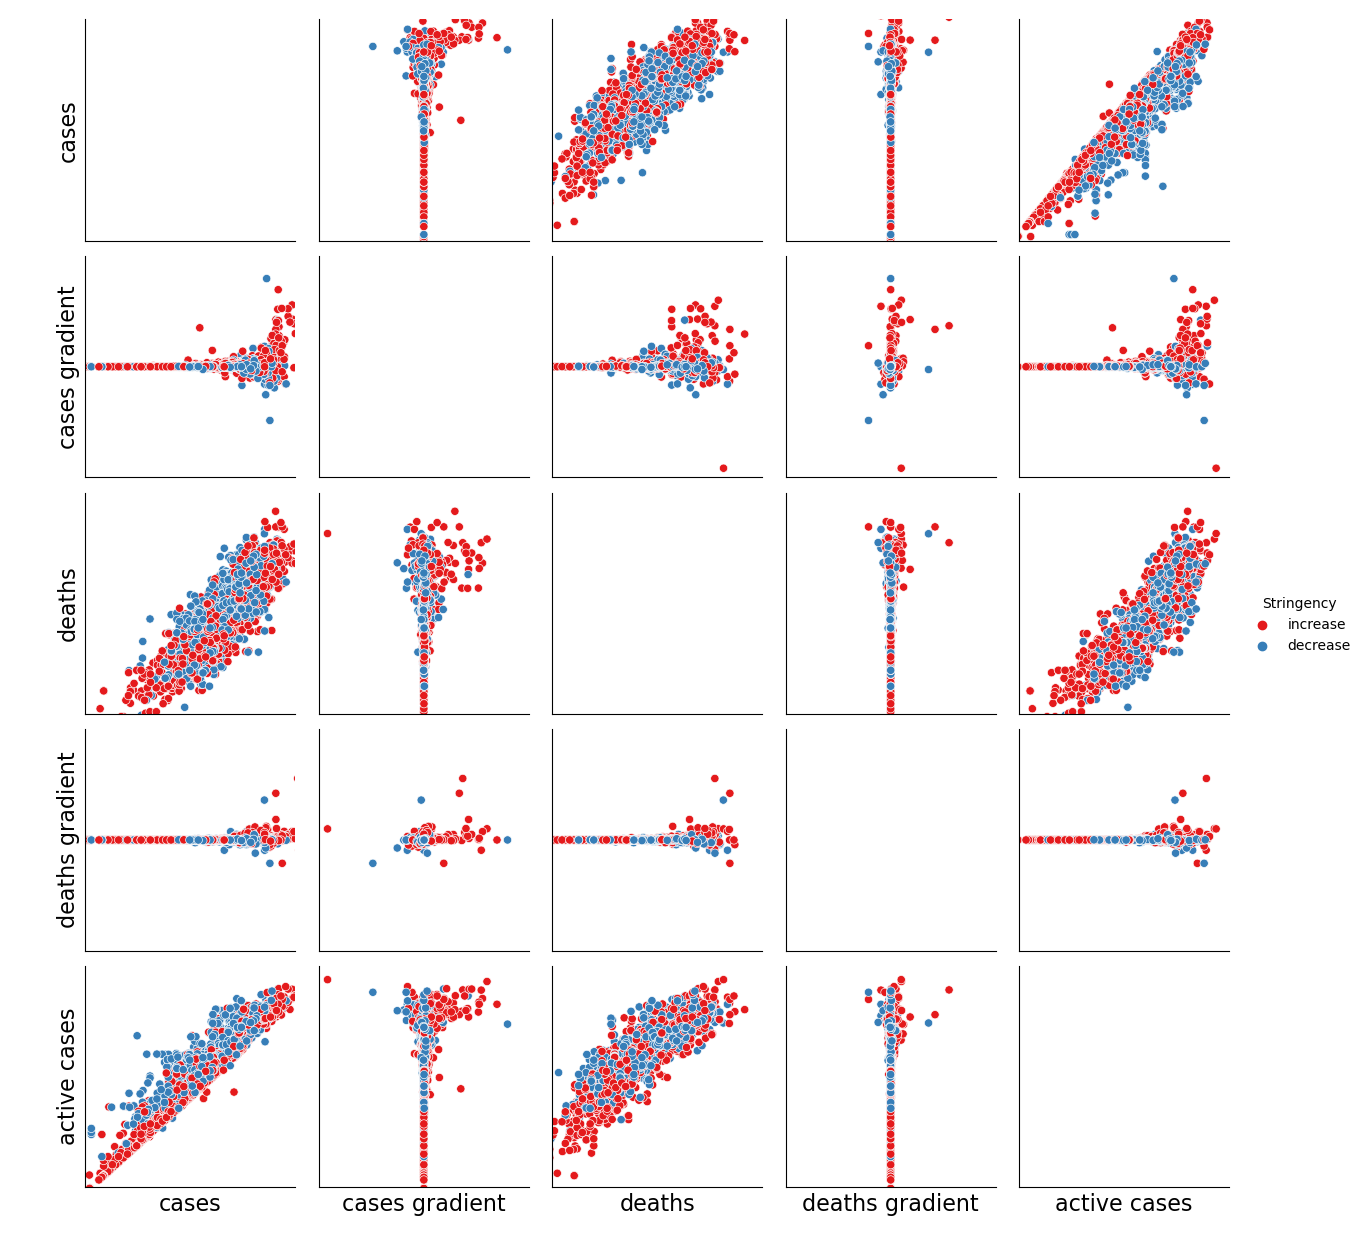

In [37]:
import matplotlib.pylab as plt
PlotMatrix_curr = plotMatrix
# create column with stringency increase or decrease
stringencyChange = ['none'] * len(PlotMatrix_curr)
for ii in range(len(PlotMatrix_curr)):
    if PlotMatrix_curr['SIndex increase'].iloc[ii]:
        stringencyChange[ii] = 'increase'
    elif PlotMatrix_curr['SIndex decrease'].iloc[ii]:
        stringencyChange[ii] = 'decrease'

PlotMatrix_curr['Stringency'] = stringencyChange
PlotMatrix_curr = PlotMatrix_curr[PlotMatrix_curr['Stringency']!='none']
PlotMatrix_curr = PlotMatrix_curr.rename(columns={'Normalized daily cases': 'cases', 'Normalized daily cases gradient': 'cases gradient', 'Normalized daily deaths': 'deaths','Normalized daily deaths gradient': 'deaths gradient', 'Normalized active cases': 'active cases'})

myPlot = sns.pairplot(PlotMatrix_curr, vars=['cases', 'cases gradient', 'deaths','deaths gradient', 'active cases'], 
                      hue = 'Stringency', diag_kind= 'None', palette="Set1")
varLim = [[1e-4,1e2],[-1e1,1e1],[1e-4,1e1],[-1e0,1e0],[1e-3,1e4]]
scale = ['log','linear','log','linear','log']
for ii in range(5):
    myPlot.axes[ii,ii].set_xlim((varLim[ii][0],varLim[ii][1]))
    myPlot.axes[ii,ii].set_ylim((varLim[ii][0],varLim[ii][1]))
    myPlot.axes[ii,ii].set_xscale(scale[ii])
    myPlot.axes[ii,ii].set_yscale(scale[ii])
for ii in range(5):
    for jj in range(5):
        myPlot.axes[ii,jj].tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False) 
        myPlot.axes[ii,jj].xaxis.label.set_size(16)
        myPlot.axes[ii,jj].yaxis.label.set_size(16)

f = plt.gcf()
f.savefig('govPredictions_1.pdf')

 # Train classifier
 ## Increase or decrease

In [38]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

PlotMatrix_curr = plotMatrix
# create column with stringency increase or decrease
stringencyChange = ['none'] * len(PlotMatrix_curr)
for ii in range(len(PlotMatrix_curr)):
    if PlotMatrix_curr['SIndex increase'].iloc[ii]:
        stringencyChange[ii] = 'increase'
    elif PlotMatrix_curr['SIndex decrease'].iloc[ii]:
        stringencyChange[ii] = 'decrease'

PlotMatrix_curr['Stringency'] = stringencyChange
PlotMatrix_curr = PlotMatrix_curr[PlotMatrix_curr['Stringency']!='none']

# define features
numFeatures = ['Population','Median age', 'log Normalized daily cases', 'Normalized daily cases gradient', 'Normalized daily deaths gradient', 'log Normalized active cases']
catFeatures = ['Region','Income group']

# get matrix
DataMatrix = PlotMatrix_curr
DataMatrix['log Normalized daily cases'] = np.log10(DataMatrix['Normalized daily cases'])
DataMatrix['log Normalized daily deaths'] = np.log10(DataMatrix['Normalized daily deaths'])
DataMatrix['log Normalized active cases'] = np.log10(DataMatrix['Normalized active cases'])
# clean up and remove nans
DataMatrix = DataMatrix.replace([np.inf, -np.inf], np.nan).dropna(subset=numFeatures, how="any")


# take log of disease spread feaures
X_num = DataMatrix[numFeatures].values
X_cat = DataMatrix[catFeatures].values

# take log of disease spread feaures
enc = OrdinalEncoder()
X_catTrans = enc.fit_transform(X_cat)
X = np.concatenate((X_num, X_catTrans), axis=1)

# labels
y = DataMatrix['Stringency'].values

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# run classifier  
classifier = RandomForestClassifier(max_depth=1000, random_state=0, n_estimators = 1000)
classifier.fit(X_train, y_train)

C:\Users\pwagner\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\pwagner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\pwagner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\pwagner\AppData\Local\Co

RandomForestClassifier(max_depth=1000, n_estimators=1000, random_state=0)

<IPython.core.display.Javascript object>


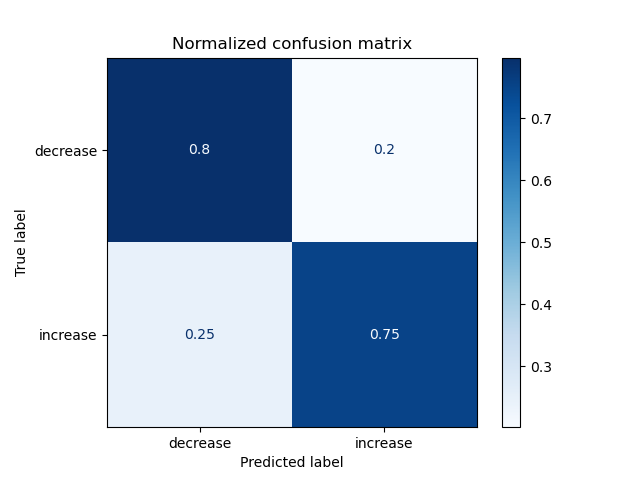

In [39]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(classifier, X_test, y_test,
                             display_labels=np.unique(y),
                             cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('Normalized confusion matrix')
f = plt.gcf()
f.savefig('govPredictions_2.pdf')

# T-SNE on full dataset

In [31]:
from sklearn.manifold import TSNE
# define dataset
DataMatrix = plotMatrix
DataMatrix['log Normalized daily cases'] = np.log10(DataMatrix['Normalized daily cases'])
DataMatrix['log Normalized daily deaths'] = np.log10(DataMatrix['Normalized daily deaths'])
DataMatrix['log Normalized active cases'] = np.log10(DataMatrix['Normalized active cases'])

numFeatures = ['Population','Median age', 'StringencyIndexForDisplay', 'GovernmentResponseIndexForDisplay', 'EconomicSupportIndex', 'ContainmentHealthIndex',  'log Normalized daily cases', 'Normalized daily cases gradient', 'log Normalized active cases', 'log Normalized daily deaths', 'Normalized daily deaths gradient']

# clean up and remove nans
DataMatrix = DataMatrix.replace([np.inf, -np.inf], np.nan).dropna(subset=numFeatures, how="any")
X = DataMatrix[numFeatures].values

X_embedded = TSNE(n_components=2).fit_transform(X)
X_embeddedMatrix = pd.DataFrame(X_embedded, columns=['E1','E2'])
X_embeddedMatrix['Region'] = DataMatrix['Region']
X_embeddedMatrix['Income group'] = DataMatrix['Income group']
X_embeddedMatrix['Median age'] = DataMatrix['Median age']
X_embeddedMatrix['Country'] = DataMatrix['Country']
X_embeddedMatrix['Waves'] = DataMatrix['Waves']

C:\Users\pwagner\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\pwagner\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [44]:
bins = np.linspace(X_embeddedMatrix['Median age'].min(), X_embeddedMatrix['Median age'].max(), 5)
digitized = np.digitize(X_embeddedMatrix['Median age'].values, bins)
X_embeddedMatrix['Agegroup'] = digitized

<IPython.core.display.Javascript object>


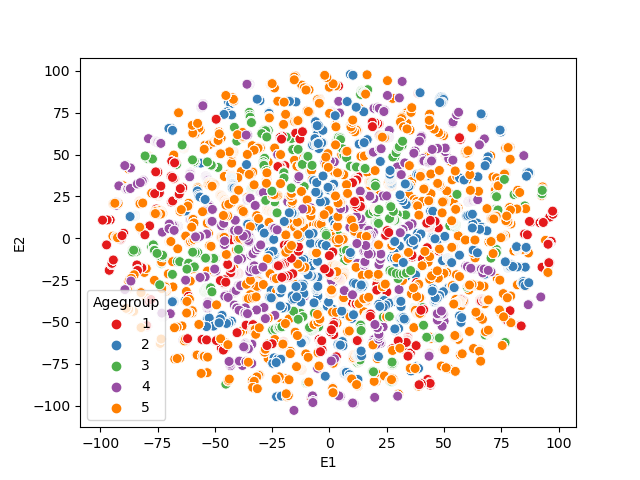

In [45]:
plt.figure()
scatterPlot = sns.scatterplot(data=X_embeddedMatrix, x = 'E1', y = 'E2', hue = 'Agegroup', palette="Set1", s=50)
#scatterPlot.set(xscale = "log", yscale="log", ylim=[1e-3, 1e3], xlim=[1e-3, 1e3])
plt.show()
f = plt.gcf()
f.savefig('TSNE_1.pdf')

In [ ]:
plt.figure()
scatterPlot = sns.scatterplot(data=X_embeddedMatrix, x = 'E1', y = 'E2', hue = 'Region', palette="Set1", s=50)
#scatterPlot.set(xscale = "log", yscale="log", ylim=[1e-3, 1e3], xlim=[1e-3, 1e3])
plt.show()
f = plt.gcf()
f.savefig('TSNE_2.pdf')

# Not used plots
## PCA

In [65]:
from sklearn.decomposition import PCA
X_embedded = PCA(n_components=2).fit_transform(X)
X_embeddedMatrix = pd.DataFrame(X_embedded, columns=['E1','E2'])
X_embeddedMatrix['Stringency'] = y
X_embeddedMatrix['Region'] = X_cat[:,0]
X_embeddedMatrix['Income group'] = X_cat[:,1]

<IPython.core.display.Javascript object>


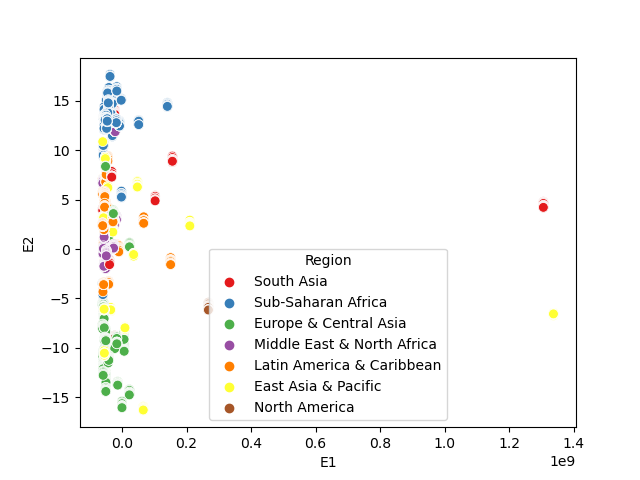

In [67]:
plt.figure()
scatterPlot = sns.scatterplot(data=X_embeddedMatrix, x = 'E1', y = 'E2', hue = 'Region', palette="Set1", s=50)
#scatterPlot.set(xscale = "log", yscale="log", ylim=[1e-3, 1e3], xlim=[1e-3, 1e3])
plt.show()

## Facial covering

<IPython.core.display.Javascript object>


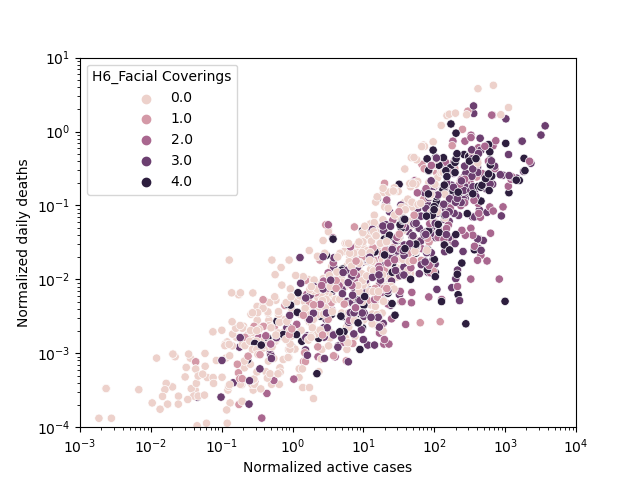

In [67]:
plt.figure()
scatterPlot = sns.scatterplot(data=plotMatrix[plotMatrix['GRIndex increase']==True], x = 'Normalized active cases', y = 'Normalized daily deaths', hue = 'H6_Facial Coverings')
sns.color_palette("rocket", as_cmap=True)
scatterPlot.set(xscale="log", yscale="log", xlim=[1e-3, 1e4], ylim=[1e-4,1e1])
plt.show()